In [4]:
import h5py

file_path = "/home/work/woojun/Capston/20242R0136COSE48002/ml/cv/best_model.weights.h5"
with h5py.File(file_path, "r") as h5_file:

    print("Keys in the file:")
    print(list(h5_file.keys()))
    
    def explore_h5_group(group, indent=0):
        for key in group.keys():
            item = group[key]
            if isinstance(item, h5py.Dataset):
                print("  " * indent + f"Dataset: {key} - shape: {item.shape}, dtype: {item.dtype}")
            elif isinstance(item, h5py.Group):
                print("  " * indent + f"Group: {key}")
                explore_h5_group(item, indent + 1)

    print("\nFile structure:")
    explore_h5_group(h5_file)


Keys in the file:
['layers', 'optimizer', 'vars']

File structure:
Group: layers
  Group: dense
    Group: vars
      Dataset: 0 - shape: (1536, 256), dtype: float32
      Dataset: 1 - shape: (256,), dtype: float32
  Group: dense_1
    Group: vars
      Dataset: 0 - shape: (256, 23), dtype: float32
      Dataset: 1 - shape: (23,), dtype: float32
  Group: dropout
    Group: vars
  Group: functional
    Group: layers
      Group: activation
        Group: vars
      Group: activation_1
        Group: vars
      Group: activation_10
        Group: vars
      Group: activation_11
        Group: vars
      Group: activation_12
        Group: vars
      Group: activation_13
        Group: vars
      Group: activation_14
        Group: vars
      Group: activation_15
        Group: vars
      Group: activation_16
        Group: vars
      Group: activation_17
        Group: vars
      Group: activation_18
        Group: vars
      Group: activation_19
        Group: vars
      Group: activati

In [6]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras import layers, models

# Recreate the base model
base_model = EfficientNetB3(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Recreate the full model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(23, activation="softmax")  # Match the output layer to your original model
])



In [8]:
for layer in model.layers:
    print(layer.name)

efficientnetb3
global_average_pooling2d_1
dense_2
dropout_1
dense_3


In [10]:
model.load_weights(
    "/home/work/woojun/Capston/20242R0136COSE48002/ml/cv/best_model.weights.h5",
    by_name=True
)

In [1]:
import tensorflow as tf

# Check for GPU
if tf.config.list_physical_devices('GPU'):
    print("Using GPU for training")
else:
    print("No GPU detected, using CPU")

2024-11-17 10:05:37.907813: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-17 10:05:38.089348: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-17 10:05:38.096131: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/compat/lib.real:/usr/local/lib/python3.10/dist-packages/torch/lib:/

No GPU detected, using CPU


2024-11-17 10:05:41.375911: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/compat/lib.real:/usr/local/lib/python3.10/dist-packages/torch/lib:/usr/local/lib/python3.10/dist-packages/torch_tensorrt/lib:/usr/local/cuda/compat/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda-12.5:/usr/local/cuda-12.5/include:/usr/include/x86_64-linux-gnu
2024-11-17 10:05:41.376095: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/compat/lib.real:/usr/local/lib/python3.10/dist-packages/torch/lib:/usr/local/lib/python3.10/dist-packages/torch_tensorrt/lib:/usr/local/c

In [ ]:
from tensorflow.keras.applications import EfficientNetB3

# Load the pre-trained model with ImageNet weights
base_model = EfficientNetB3(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Freeze layers
for layer in base_model.layers[:int(len(base_model.layers) * 0.8)]:  # Freezing 80% of the layers
    layer.trainable = False

# Confirm frozen layers
for layer in base_model.layers:
    print(layer.name, layer.trainable)

input_layer False
rescaling False
normalization False
rescaling_1 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block1b_dwconv False
block1b_bn False
block1b_activation False
block1b_se_squeeze False
block1b_se_reshape False
block1b_se_reduce False
block1b_se_expand False
block1b_se_excite False
block1b_project_conv False
block1b_project_bn False
block1b_drop False
block1b_add False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
b

In [ ]:
from tensorflow.keras import layers, models

# Create the model with the base and new layers on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu"),  # Additional dense layer for learning
    layers.Dropout(0.5),  # Optional: dropout for regularization
    layers.Dense(23, activation="softmax")  # Output layer with softmax for multi-class classification
])


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shubhamgoel27/dermnet")

print("Path to dataset files:", path)

100%|██████████| 1.72G/1.72G [00:46<00:00, 40.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shubhamgoel27/dermnet/versions/1


In [ ]:
import os

image_count = sum([len(files) for r, d, files in os.walk(path + "/train")])
print("Total images in train directory:", image_count)

Total images in train directory: 15557


In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    path + "/train",
    image_size=(224, 224),
    batch_size=48,
    label_mode="categorical"
)

Found 15557 files belonging to 23 classes.


In [ ]:
len(train_dataset)

1038

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    path + "/test",
    image_size=(224, 224),
    batch_size=48,
    label_mode="categorical"
)

Found 4002 files belonging to 23 classes.


In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2)
])

train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x), y))

In [ ]:
len(val_dataset)

267

In [ ]:
# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=5e-6)

# Train the model
with tf.device('/GPU:0'):
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=40,
        callbacks=[checkpoint, reduce_lr]
    )

Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 92s 704ms/step - accuracy: 0.0644 - loss: 3.2050 - val_accuracy: 0.1359 - val_loss: 2.9543
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 69s 673ms/step - accuracy: 0.1511 - loss: 2.8936 - val_accuracy: 0.2256 - val_loss: 2.7143
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 70s 677ms/step - accuracy: 0.2061 - loss: 2.7479 - val_accuracy: 0.2462 - val_loss: 2.6442
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 69s 673ms/step - accuracy: 0.2541 - loss: 2.6012 - val_accuracy: 0.2154 - val_loss: 2.6497
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 69s 675ms/step - accuracy: 0.2278 - loss: 2.6565 - val_accuracy: 0.3128 - val_loss: 2.4746
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 68s 663ms/step - accuracy: 0.2233 - loss: 2.6559 - val_accuracy: 0.2667 - val_loss: 2.5312
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 69s 666ms/step - accuracy: 0.2181 - loss: 2.6277 - val_accuracy: 0.3256 - val_loss: 2.4145
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 69s 671ms/step - accuracy: 0.2452 - loss: 2

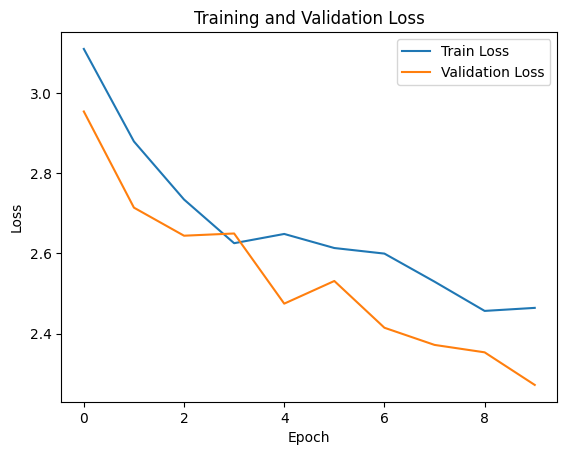

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()